In [3]:
import torch
import pandas as pd
from tqdm.notebook import tqdm


In [4]:
df = pd.read_csv("C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/data/train_all_tasks.csv")
df.shape

(14000, 5)

In [5]:
df = df[df['label_sexist'] == 'sexist']
df.head(10)

,rewire_id,text,label_sexist,label_category,label_vector
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
11,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
17,sexism2022_english-1108,ugly chicks A pussy is a pussy.,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
18,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
19,sexism2022_english-10014,How about I talk shit to an idiot like you? Ar...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
21,sexism2022_english-10606,If you want to attack culture and norms you ha...,sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...
24,sexism2022_english-16370,"Nah, black women still get more replies on tin...",sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...
25,sexism2022_english-4429,dumb ass women today ask more why you are not ...,sexist,2. derogation,2.2 aggressive and emotive attacks
32,sexism2022_english-18545,Men can be whores also.,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
33,sexism2022_english-11481,Husbands. Kill your piece of shit commie wives,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


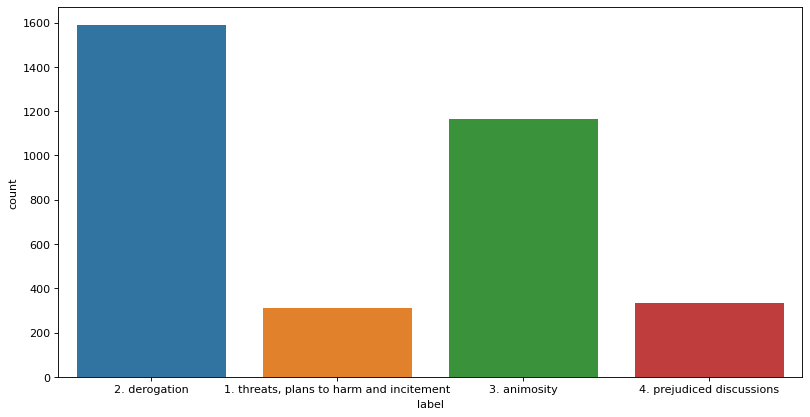

In [7]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
sns.countplot(x = df.label_category)
plt.xlabel('label');


In [8]:
# Encoding categorical data to integer labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_category'] = le.fit_transform(df['label_category'])
print(df['label_category'])

8        1
11       1
17       1
18       0
19       2
        ..
13977    1
13990    2
13993    3
13994    1
13995    1
Name: label_category, Length: 3398, dtype: int32


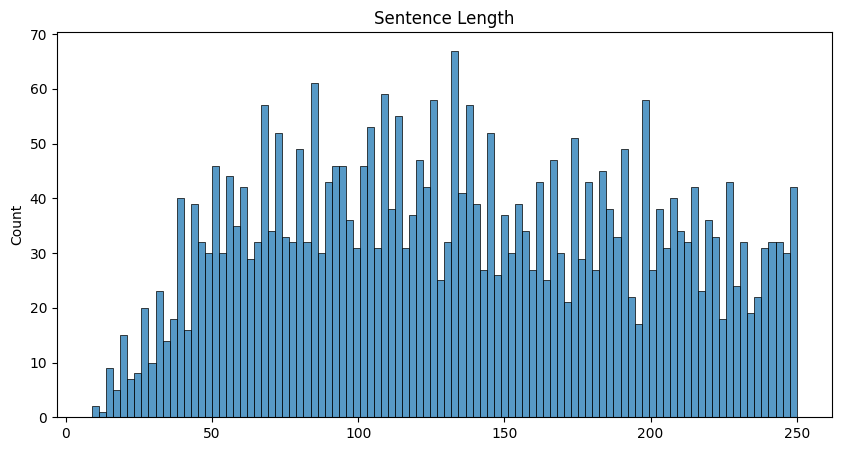

In [9]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.text], bins=100)
plt.title('Sentence Length')
plt.show()


In [10]:
#find the maximum length
max_len = max([len(sent) for sent in df.text])
print('Max length: ', max_len)


Max length:  250


In [11]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                   df.label_category.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.label_category.values)


In [12]:
#create new column
df['data_type'] = ['not_set'] * df.shape[0]
df.head()


,rewire_id,text,label_sexist,label_category,label_vector,data_type
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,1,2.3 dehumanising attacks & overt sexual object...,not_set
11,sexism2022_english-760,They get the initial chance because they are a...,sexist,1,2.1 descriptive attacks,not_set
17,sexism2022_english-1108,ugly chicks A pussy is a pussy.,sexist,1,2.3 dehumanising attacks & overt sexual object...,not_set
18,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,0,1.2 incitement and encouragement of harm,not_set
19,sexism2022_english-10014,How about I talk shit to an idiot like you? Ar...,sexist,2,"3.1 casual use of gendered slurs, profanities,...",not_set


In [13]:
#fill in data type
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'


In [14]:
df.groupby(['label_category', 'data_type']).count()


rewire_id  text  label_sexist  label_vector
label_category data_type                                             
0              train            264   264           264           264
               val               46    46            46            46
1              train           1351  1351          1351          1351
               val              239   239           239           239
2              train            990   990           990           990
               val              175   175           175           175
3              train            283   283           283           283
               val               50    50            50            50

TOKENIZATION

In [15]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset


In [16]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)


In [17]:
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [18]:
#tokenizer val set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


In [19]:
encoded_data_train


{'input_ids': tensor([[  101,  2074,  1996,  ...,     0,     0,     0],
        [  101,  2027,  2131,  ...,     0,     0,     0],
        [  101,  9200, 20649,  ...,     0,     0,     0],
        ...,
        [  101,  2196,  5293,  ...,     0,     0,     0],
        [  101,  8840,  2140,  ...,     0,     0,     0],
        [  101, 15420,  2066,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

ENCODING

In [20]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label_category.values)


In [21]:
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label_category.values)


In [22]:
input_ids_train


tensor([[  101,  2074,  1996,  ...,     0,     0,     0],
        [  101,  2027,  2131,  ...,     0,     0,     0],
        [  101,  9200, 20649,  ...,     0,     0,     0],
        ...,
        [  101,  2196,  5293,  ...,     0,     0,     0],
        [  101,  8840,  2140,  ...,     0,     0,     0],
        [  101, 15420,  2066,  ...,     0,     0,     0]])

In [23]:
attention_masks_train


tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [24]:
labels_train


tensor([1, 1, 1,  ..., 3, 1, 1], dtype=torch.int32)

In [25]:
#create dataloader
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [26]:
print(len(dataset_train))
print(len(dataset_val))


2888
510


In [27]:
dataset_train


In [28]:
dataset_train.tensors


(tensor([[  101,  2074,  1996,  ...,     0,     0,     0],
         [  101,  2027,  2131,  ...,     0,     0,     0],
         [  101,  9200, 20649,  ...,     0,     0,     0],
         ...,
         [  101,  2196,  5293,  ...,     0,     0,     0],
         [  101,  8840,  2140,  ...,     0,     0,     0],
         [  101, 15420,  2066,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([1, 1, 1,  ..., 3, 1, 1], dtype=torch.int32))


SET UP BERT PRETRAINED MODEL
```
# This is formatted as code
```



In [29]:
label_dict = {'1. threats, plans to harm and incitement': 0,'2. derogation': 1, '3. animosity': 2, '4. prejudiced discussions': 3}

In [30]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [31]:
#model summary
model.config


BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Create Data Loaders

In [32]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

Set Up Optimizer and Scheduler


In [33]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5



c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [34]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

Define Performance Metrics


In [35]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')


In [36]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')


In [41]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2].type(torch.LongTensor).to(device)}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

TRAIN MODEL

In [38]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)



In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [42]:
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0
    
    #set up progress bar
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2].type(torch.LongTensor).to(device)}
        
        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()
        
        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    tqdm.write('\nEpoch {epoch}')
    
    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.0956858294987613


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 0.9575545266270638
F1 Score (weighted): 0.5237863364293086


Epoch 2:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.79769999009668


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 0.9566840529441833
F1 Score (weighted): 0.5593417628719498


Epoch 3:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.525629096847657


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 1.2606318928301334
F1 Score (weighted): 0.5614920481056482


Epoch 4:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.32192789067783834


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 2.0497204698622227
F1 Score (weighted): 0.5605927138295325


Epoch 5:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.180824876946579


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 2.4881357699632645
F1 Score (weighted): 0.5666896612246771


Epoch 6:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.09852360884405523


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 2.7639364823698997
F1 Score (weighted): 0.5703862775443062


Epoch 7:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.05443073474170661


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 2.979390025138855
F1 Score (weighted): 0.5593979540131191


Epoch 8:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.042225777350568955


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 3.1362613290548325
F1 Score (weighted): 0.5591499182914365


Epoch 9:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.033300231271050126


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 3.215526580810547
F1 Score (weighted): 0.5496801336137557


Epoch 10:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.020221271041397443


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 3.211014397442341
F1 Score (weighted): 0.5547583746126851


Model Evaluation


In [43]:
outputs.loss


tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)

In [44]:
outputs.logits


tensor([[-2.3581,  7.0423, -2.4233, -2.5699],
        [-2.4870, -2.2691, -1.2460,  5.9182],
        [-1.9245, -3.3661,  6.8162, -1.8451],
        [-1.6604, -3.8284,  6.9594, -1.5671]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [45]:
#save model
model.to(device)
pass


In [46]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/16 [00:00<?, ?it/s]

In [47]:
#get accuracy score
accuracy_per_class(predictions, true_vals)

Class: 1. threats, plans to harm and incitement
Accuracy:25/46

Class: 2. derogation
Accuracy:144/239

Class: 3. animosity
Accuracy:92/175

Class: 4. prejudiced discussions
Accuracy:22/50



In [48]:
predictions

array([[-3.254871  , -0.6262885 ,  6.7244964 , -3.3709831 ],
       [-2.4252582 , -4.185751  ,  5.687145  ,  0.7563645 ],
       [-1.3031354 ,  6.7157693 , -2.6534266 , -3.2947903 ],
       ...,
       [-0.06379211,  4.881745  , -5.282476  ,  0.22549137],
       [-3.0356195 ,  7.090771  , -2.3557932 , -2.3961897 ],
       [-3.3302834 ,  6.3417974 , -0.26619717, -3.5608647 ]],
      dtype=float32)

In [49]:
true_vals

array([2, 0, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       3, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 3, 1, 1,
       1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 3, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 3, 2, 1, 0, 1, 3, 1, 1, 1, 1, 3, 2, 1, 0, 3, 1, 2, 1, 3, 2, 2,
       1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 3,
       1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 3,
       1, 0, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 1, 1,
       0, 3, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 3, 2, 0, 2, 2, 2,
       3, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1,
       2, 2, 2, 2, 3, 1, 1, 2, 3, 1, 2, 0, 1, 2, 2, 0, 3, 0, 2, 1, 1, 1,
       1, 2, 3, 1, 3, 3, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 3, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 3, 0, 2, 1, 2, 2, 1, 1, 2, 1,

In [50]:
preds_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_vals.flatten()

print(preds_flat)
print(labels_flat)

[2 2 1 3 2 1 1 1 1 1 2 1 1 2 1 1 1 2 3 2 1 2 3 1 1 2 2 2 2 2 3 1 2 1 2 1 1
 1 2 2 2 1 1 2 1 3 0 1 2 2 1 1 1 2 2 2 0 1 1 2 2 1 0 2 2 1 1 2 2 1 3 3 2 1
 1 1 1 2 2 3 1 2 3 1 1 2 1 2 3 3 2 2 1 1 3 1 3 2 0 3 1 1 2 3 1 2 1 3 2 2 1
 2 1 2 3 1 2 1 1 2 0 2 1 0 2 2 1 2 2 2 1 3 1 2 1 2 2 1 1 3 1 0 1 0 1 1 1 1
 1 1 0 1 2 1 1 1 2 2 1 2 2 3 1 2 1 1 2 1 1 2 1 2 1 1 1 1 1 2 1 2 2 2 1 0 1
 1 3 2 2 1 2 0 2 2 3 2 1 1 3 1 2 2 2 1 2 0 2 1 0 2 1 1 2 1 0 2 0 1 2 1 1 2
 1 1 1 1 1 2 2 1 2 1 1 2 0 2 2 0 1 2 2 1 2 2 3 1 1 1 1 1 0 1 2 3 1 1 1 2 2
 1 1 1 1 1 2 1 1 1 1 1 3 2 2 1 1 1 1 2 1 0 0 2 1 2 2 1 1 2 1 2 2 1 0 2 1 1
 2 1 1 1 2 2 2 1 2 3 3 1 0 0 1 1 1 3 2 1 1 1 1 2 0 2 1 1 3 1 1 1 1 1 1 1 2
 2 2 0 2 0 3 0 3 1 2 1 3 1 2 1 2 1 1 1 1 2 2 2 1 2 2 1 1 0 1 3 1 1 1 2 0 1
 1 2 2 2 2 2 3 1 2 2 1 2 1 1 1 1 2 1 2 2 1 1 1 0 2 1 0 2 1 1 1 1 1 1 1 3 1
 0 1 2 2 1 1 1 1 1 1 1 1 1 2 3 1 2 2 1 1 2 1 1 1 1 1 2 1 1 2 1 2 3 1 0 1 1
 2 0 1 2 1 2 2 2 1 2 2 3 1 2 0 2 3 1 0 2 1 1 2 2 2 1 1 3 3 1 2 1 1 2 1 1 3
 2 2 1 1 2 2 3 1 1 1 2 2 

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [52]:
accuracy = accuracy_score(y_true = labels_flat, y_pred = preds_flat )
f1 = f1_score(y_true = labels_flat, y_pred = preds_flat, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = labels_flat, y_pred = preds_flat ))

The accuracy from sentiment classification: 0.5549019607843138
with f1 score: 0.5547583746126851
              precision    recall  f1-score   support

           0       0.68      0.54      0.60        46
           1       0.58      0.60      0.59       239
           2       0.51      0.53      0.52       175
           3       0.48      0.44      0.46        50

    accuracy                           0.55       510
   macro avg       0.56      0.53      0.54       510
weighted avg       0.56      0.55      0.55       510



Text(0.5, 1.0, 'Sentiment classification')

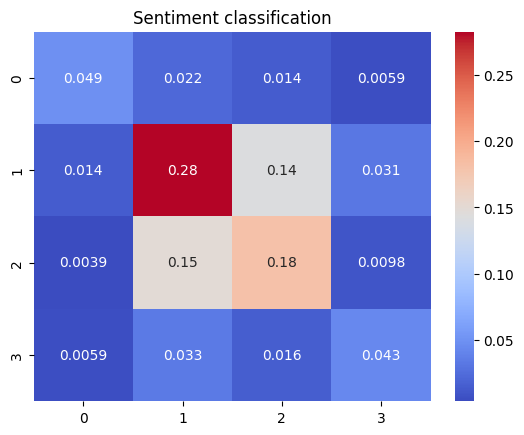

In [53]:
sns.heatmap(confusion_matrix(y_true= labels_flat, y_pred = preds_flat) / len(preds_flat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [54]:
import joblib
filename = 'final_model_B.sav'
joblib.dump(model, filename)

['final_model_B.sav']

In [56]:
torch.save(model, "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/Bert-based-uncased/model_B")

In [57]:
torch.save(model.state_dict(), "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/Bert-based-uncased/model_B_stats")

In [ ]:
# load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)